# 보스톤 집값 예측

## 패키지 로딩


In [3]:
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd


In [4]:
import warnings
warnings.filterwarnings(action='ignore')


In [8]:
df = pd.read_csv('dataset/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
df = df.fillna(0)

## x 변수들과 y('price')와의 상관관계 시각화

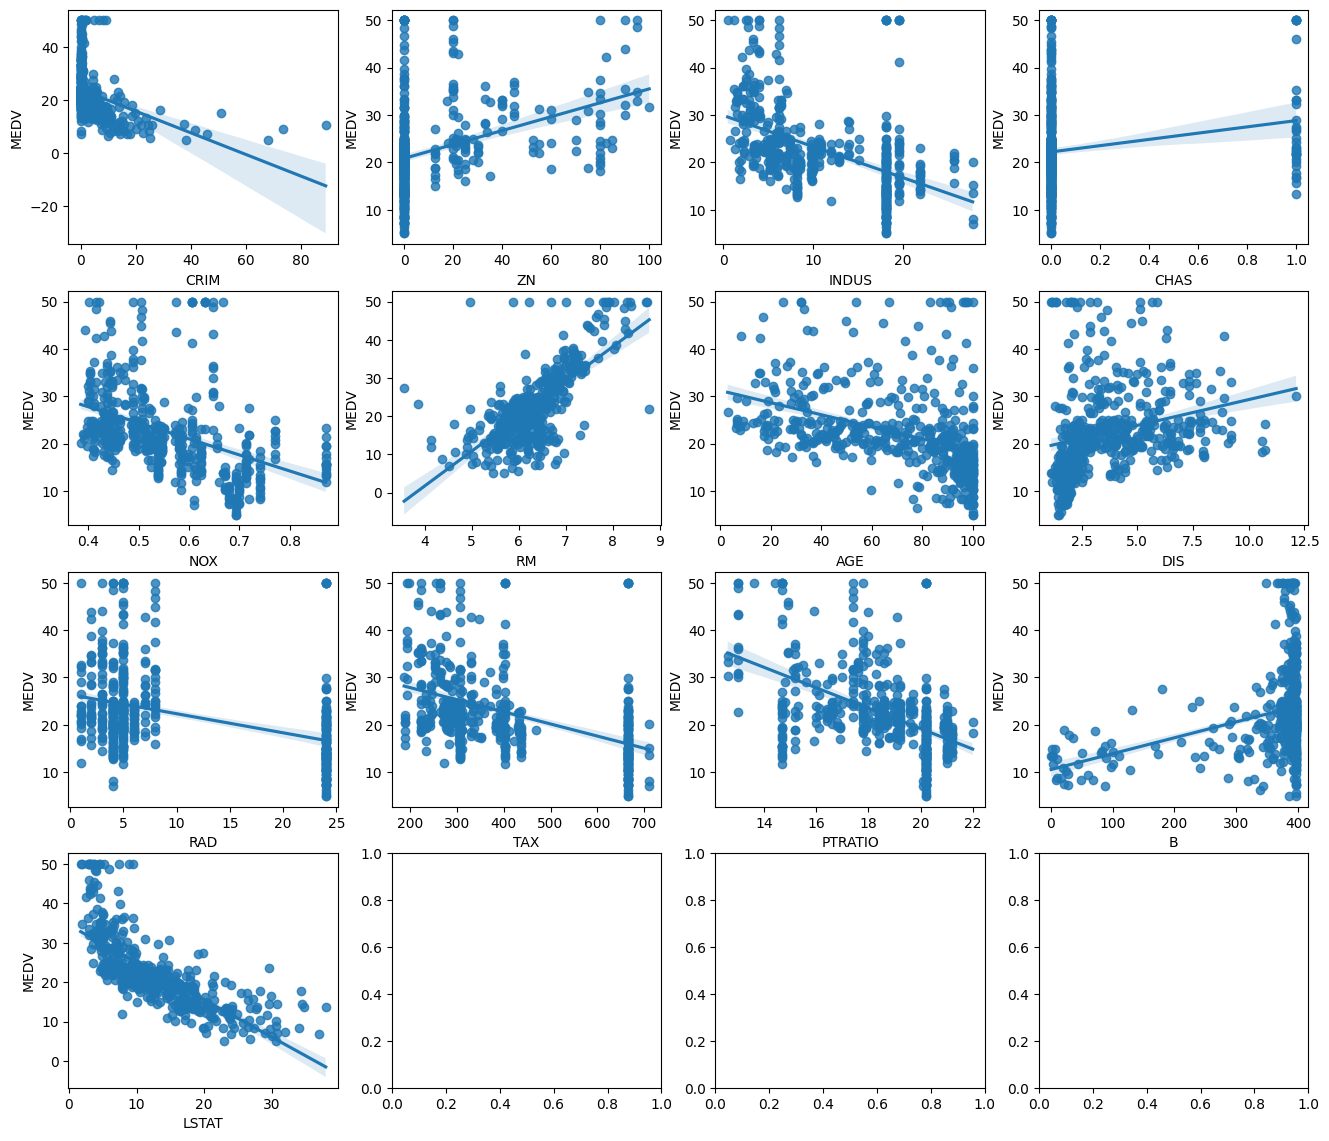

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(4,4,figsize = (16,14))
for i ,feature in enumerate(df.columns[:13]):
    row = int(i/4)
    col = i%4
    sns.regplot(data=df, x= feature, y = 'MEDV', ax = axis[row][col])

## 데이터 스케일링


In [71]:
# df_filled = df.fillna(df.mean())
scaler = StandardScaler()
scaler_data = scaler.fit_transform(df.drop('MEDV', axis=1))

scaled_df = pd.DataFrame(scaler_data, columns=df.columns[:13])
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.404235,0.314369,-1.185361,-0.268391,-0.144217,0.413672,-0.020015,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-0.973338
1,-0.401785,-0.468160,-0.508491,-0.268391,-0.740262,0.194274,0.429306,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.413519
2,-0.401787,-0.468160,-0.508491,-0.268391,-0.740262,1.282714,-0.154484,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.101181
3,-0.401194,-0.468160,-1.203847,-0.268391,-0.835284,1.016303,-0.656281,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.247865
4,-0.396912,-0.468160,-1.203847,-0.268391,-0.835284,1.228577,-0.380784,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.643506


## 학습 및 평가 데이터 분리

In [72]:
X_train,X_test,y_train,y_test = train_test_split(scaler_data,df['MEDV'],test_size=0.3,random_state=10)
# boston.target == df['MEDV']
X_train.shape, y_train.shape, X_test.shape,y_test.shape
print(X_train.shape)
print(y_train.shape)

(354, 13)
(354,)


## 표준화 하지 않은 데이터의 분할

In [79]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('MEDV', axis=1),df['MEDV'],test_size=0.3,random_state=10)
# boston.target == df['MEDV']
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((354, 13), (354,), (152, 13), (152,))

# 회귀모델 생성

### 일반 회귀 모델

In [80]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 확률적 경사하강법 적용 회귀모델

In [84]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=2000, eta0=0.005,verbose=1)
model.fit(X_train,y_train)

-- Epoch 1
Norm: 447556119609.19, NNZs: 13, Bias: 2267815115.183249, T: 354, Avg. loss: 52832993870059017687711875072.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 624359678102.40, NNZs: 13, Bias: 4746194047.328526, T: 708, Avg. loss: 25072727577257007959177691136.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 787503046639.49, NNZs: 13, Bias: 3632270669.921939, T: 1062, Avg. loss: 18481547084352413811532103680.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1109994272644.69, NNZs: 13, Bias: 5691475567.853581, T: 1416, Avg. loss: 16773658178913264432953950208.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 869971966518.95, NNZs: 13, Bias: 3245122346.272844, T: 1770, Avg. loss: 13985439837264301587301400576.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 929470145501.90, NNZs: 13, Bias: -246933631.564479, T: 2124, Avg. loss: 13143806817018392455071924224.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1293511282522.41, 

SGDRegressor(eta0=0.005, max_iter=2000, verbose=1)

## 모델 검증 미 결정계수 확ㅇ니


In [81]:
print(f'결정계수: {model.score(X_test,y_test):.3f}')
print(f'절편:{model.intercept_}')
weight = { f:w for f,w in zip(df.columns,model.coef_)}
print(f'추정 계수(가중치):{model.coef_}')
print(pd.Series(weight).sort_values(ascending=False))

결정계수: 0.685
절편:29.949859115237743
추정 계수(가중치):[-1.54282388e-01  5.82119146e-02 -6.93875221e-02  2.02740999e+00
 -1.37911910e+01  3.91306984e+00 -1.22059034e-02 -1.52066366e+00
  2.64388668e-01 -1.07123850e-02 -8.27620028e-01  1.34893990e-02
 -4.16535164e-01]
RM          3.913070
CHAS        2.027410
RAD         0.264389
ZN          0.058212
B           0.013489
TAX        -0.010712
AGE        -0.012206
INDUS      -0.069388
CRIM       -0.154282
LSTAT      -0.416535
PTRATIO    -0.827620
DIS        -1.520664
NOX       -13.791191
dtype: float64


## 모델 예측

In [76]:
from sklearn.metrics import mean_squared_error

y_hat = model.predict(X_test)
mse = mean_squared_error(y_test,y_hat)
print(f'RMSE: {np.sqrt(mse)}')
compare_df = pd.DataFrame({'실제 값':y_test[:10],'예측값': np.round(y_hat[:10],2)})
display(compare_df)


RMSE: 5.54428579144351


,실제 값,예측값
305,28.4,31.24
193,31.1,32.58
65,23.5,30.75
349,26.6,25.26
151,19.6,17.77
433,14.3,15.68
161,50.0,34.39
129,14.3,14.13
269,20.7,25.31
226,37.6,37.68


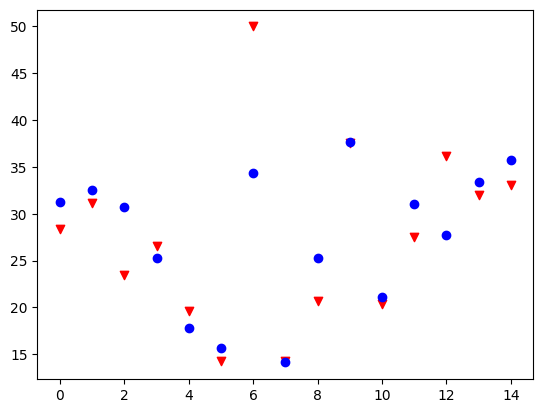

In [77]:
plt.scatter(range(15), y_test[:15],marker='v',color='r',label = 'y')
plt.scatter(range(15), y_hat[:15],marker='o',color='b',label = 'y_hat')

## 학습 곡선


In [87]:
def plot_learning_curve(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =10)
    train_error = []
    test_error = []
    for n in range(1,len(X_train)+1):
        model.fit(X_train[:n],y_train[:n])
        y_train_predict = model.predict(X_train[:n])
        y_test_predict = model.predict(X_test)
        train_error.append(mean_squared_error(y_train[:n], y_test_predict))
        test_error.append(mean_squared_error(y_test,y_test_predict))
    
    plt.plot(np.sqrt(train_error),'r-+',linewidth=2,label= 'train')
    plt.plot(np.sqrt(test_error),'b-',linewidth=2,label= 'test')
    plt.legend()
    plt.xlabel('Training set size',fontsize = 14)
    plt.ylabel('RSME',fontsize = 14)
    plt.show()

# [실습] 강남역 출근시간 승하차 인원 예측하기
- 1~4호선 승하차 인원 통계 데이터를 활용하여 강남역 출근시간(07시~08시) 승하차 인원을 예측 한다
- 데이터 구조
    - Date : 날짜
    - Type : 승하차 유형 (승차:on, 하차:off)
    - 요일 : Mon~Sun
    - 시간 : 05 ~ 02
- 데이터 분석 절차
    - 패키지 로딩
    - 데이터 로딩 및 확인
    - 데이터 전처리
        - 'Date' 컬럼 삭제
        - 'Type' 컬럼 값 라벨 인코딩
        - 'DoW' 컬럼 값 라벨 인코딩
    - 독립변수와 종속변수 분리
    - 학습 데이터와 평가 데이터 분할
    - 모델 생성 및 학습
    - 예측, 평가 (R2, MSE, RMSE)

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

df = pd.read_csv('GangnamTrainData.csv')
df.drop('Date', axis=1, inplace=True)
df
df['Type'] = df['Type'].replace({'on': 1, 'off': 0})
# df =pd.get_dummies(df,columns=['Type'])
df.head()
week = np.sort(df['DoW'].unique())
week
df['DoW'] = df['DoW'].map({v:i for i, v in enumerate(week)})
df.head()
# day_of_week_mapping = { 'Mon' : 1,'Tue': 2,'Wed': 3,'Thu': 4,'Fri': 5,'Sat': 6,'Sun': 7}
# df['DoW'] = df['DoW'].replace(day_of_week_mapping)
# df

# scaler = StandardScaler()
# scaler_data = scaler.fit_transform(df)

# scaled_df = pd.DataFrame(scaler_data, columns=df.columns)
# scaled_df.head()

# X_train,X_test,y_train,y_test = train_test_split(scaler_data,df['Type'],test_size=0.3,random_state=10)
# X_train.shape, y_train.shape, X_test.shape,y_test.shape

# model = LinearRegression()
# model.fit(X_train,y_train)

# print(f'결정계수: {model.score(X_test,y_test):.3f}')
# print(f'절편:{model.intercept_}')
# weight = { f:w for f,w in zip(df.columns,model.coef_)}
# print(f'추정 계수(가중치):{model.coef_}')
# print(pd.Series(weight).sort_values(ascending=False))

,Type,DoW,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,01 ~ 02
0,1,0,1187,909,562,568,604,777,858,1183,...,2268,2549,2524,2386,2486,3333,3481,2054,0,0
1,0,0,110,551,635,1066,1809,1506,1553,2123,...,2861,3259,3202,2529,1925,1610,1351,913,2,0
2,1,2,402,509,515,747,1056,1368,1808,2492,...,4928,5544,4643,3537,3754,4982,5591,3423,0,0
3,0,2,118,548,889,2372,4396,3613,3314,4357,...,4544,5552,5689,3703,2622,2354,1764,1534,5,0
4,1,3,646,547,473,600,895,917,1245,1707,...,3370,3642,3526,3084,3493,4327,3835,1812,0,0


In [145]:
y = df['07 ~ 08']
X = df.drop('07 ~ 08',axis=1)

### 학습 데이터 및 평가 데이터 분할

In [146]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### 모델 생성및 학습


In [147]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## 모델 예측 및 평가

In [152]:
y_hat = model.predict(X_test)
print('실제 값:',y_test[:10].values)
print('예측 값:',y_hat[:10].astype(int))

실제 값: [7338  839  567 8348 2255 2096 7505 1617 7871 2248]
예측 값: [7552  802  557 8672 2184 2101 7370 1544 7691 2274]


In [155]:
print(f'결정계수:{model.score(X_test,y_test):.3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_hat)):.3f}')
print(np.mean(y_test))

결정계수:0.991
RMSE: 288.329
3623.2295081967213
